In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("C:\\Users\\Admin\\python\\scikit-learn\\OnlineRetail.csv", encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [11]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [12]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df_m = df.groupby('CustomerID')['Amount'].sum()
df_m = df_m.reset_index()
df_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [14]:
df_f = df.groupby('CustomerID')['InvoiceNo'].count()
df_f = df_f.reset_index()
df_f.columns = ['CustomerID', 'Frequency']
df_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
df_retail = pd.merge(df_m, df_f, on = 'CustomerID', how = 'inner' )
df_retail.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%d-%m-%Y %H:%M')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [20]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [21]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [23]:
df_p = df.groupby('CustomerID')['Diff'].min()
df_p = df_p.reset_index()
df_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [24]:
df_p['Diff'] = df_p['Diff'].dt.days
df_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [25]:
df_retail = pd.merge(df_retail, df_p, on='CustomerID', how='inner')
df_retail.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
df_retail.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [26]:
df_retail.shape

(4373, 4)

Text(0.5, 0, 'Attributes')

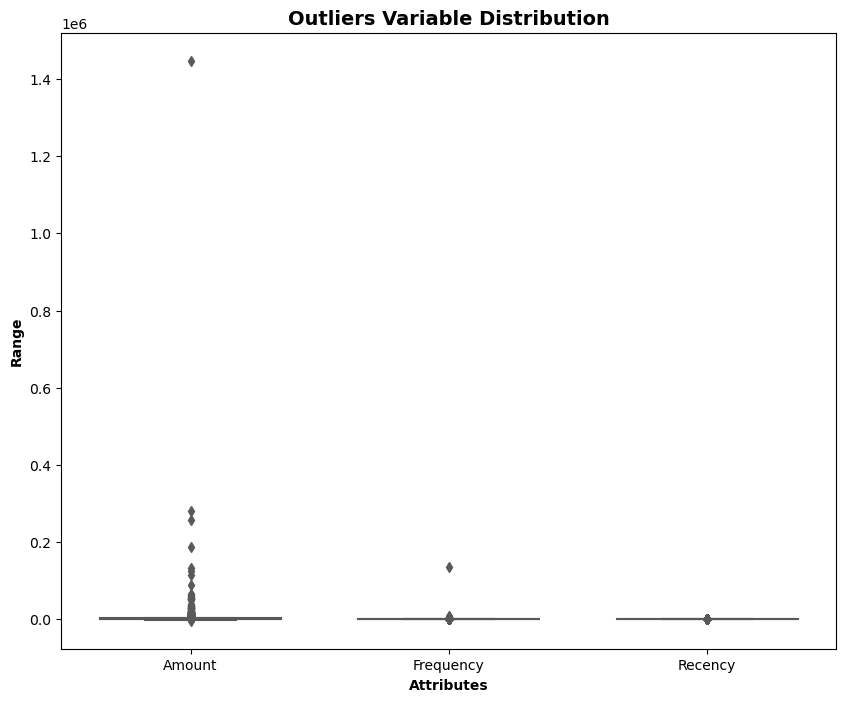

In [30]:
attributes= [ 'Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_retail[attributes], orient="v", palette="Set2", whis = 1.5,saturation = 1, width= 0.7)
plt.title("Outliers Variable Distribution",  fontsize = 14, fontweight = 'bold')
plt.ylabel('Range', fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [31]:
# Removing statistical outliers for Amount
Q1 = df_retail.Amount.quantile(0.05)  # 5th percentile
Q3 = df_retail.Amount.quantile(0.95)  # 95th percentile
IQR = Q3 - Q1
df_retail = df_retail[(df_retail.Amount >= Q1 - 1.5 * IQR) & (df_retail.Amount <= Q3 + 1.5 * IQR)]

# Removing statistical outliers for Recency
Q1 = df_retail.Recency.quantile(0.05)
Q3 = df_retail.Recency.quantile(0.95)
IQR = Q3 - Q1
df_retail = df_retail[(df_retail.Recency >= Q1 - 1.5 * IQR) & (df_retail.Recency <= Q3 + 1.5 * IQR)]

# Removing statistical outliers for Frequency
Q1 = df_retail.Frequency.quantile(0.05)
Q3 = df_retail.Frequency.quantile(0.95)
IQR = Q3 - Q1
df_retail = df_retail[(df_retail.Frequency >= Q1 - 1.5 * IQR) & (df_retail.Frequency <= Q3 + 1.5 * IQR)]


In [32]:
df_retail.shape

(4294, 4)

In [35]:
df1 = df_retail[['Amount', 'Frequency', 'Recency']]

scaler = StandardScaler()

df_retail_scaled = scaler.fit_transform(df1)
df_retail_scaled.shape

(4294, 3)

In [36]:
df_retail_scaled

array([[-0.72113889, -0.75308301,  2.30186785],
       [ 1.71972644,  1.04159382, -0.90626914],
       [ 0.29668496, -0.46394063, -0.18344815],
       ...,
       [-0.67536842, -0.70323088,  0.86612753],
       [-0.62112571, -0.64340832, -0.84685919],
       [ 0.31936065, -0.07509399, -0.50030119]])

In [37]:
df_retail_scaled = pd.DataFrame(df_retail_scaled)
df_retail_scaled.columns = ['Amount', 'Frequency', 'Recency']
df_retail_scaled.head()

,Amount,Frequency,Recency
0,-0.721139,-0.753083,2.301868
1,1.719726,1.041594,-0.906269
2,0.296685,-0.463941,-0.183448
3,0.274207,-0.045183,-0.737941
4,-0.531759,-0.603527,2.143441


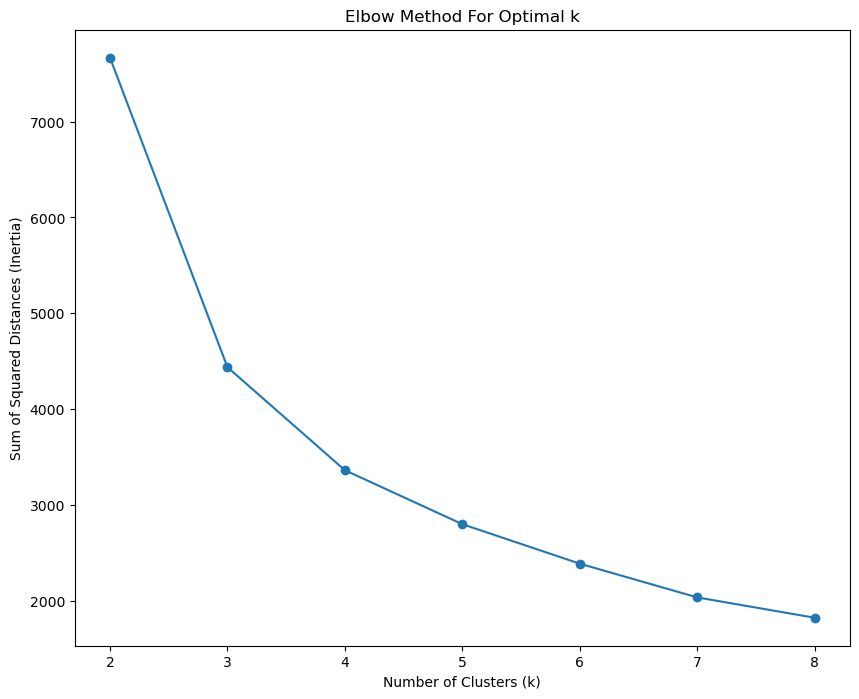

In [38]:
# Create an empty list to store Sum of Squared Distances (SSD)
ssd = []

# Define a range of potential values for the number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Loop through each value of k and fit KMeans
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_retail_scaled)  # Fit on scaled data
    ssd.append(kmeans.inertia_)   # Save the inertia (SSD)

# Plot the SSDs for each value of k
plt.plot(range_n_clusters, ssd, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [40]:
kmeans = KMeans(n_clusters = 3, max_iter=50)
kmeans.fit(df_retail_scaled)

KMeans(max_iter=50, n_clusters=3)

In [41]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [42]:
df_retail['Cluster_ID']= kmeans.labels_
df_retail.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [46]:
df_retail['Cluster_ID'].value_counts(ascending=True)

1     499
2    1068
0    2727
Name: Cluster_ID, dtype: int64

In [47]:
x = df_retail.iloc[:, [1,3]].values
x

array([[0.00000e+00, 3.25000e+02],
       [4.31000e+03, 1.00000e+00],
       [1.79724e+03, 7.40000e+01],
       ...,
       [8.08200e+01, 1.80000e+02],
       [1.76600e+02, 7.00000e+00],
       [1.83728e+03, 4.20000e+01]])

In [48]:
y_kmeans=kmeans.fit_predict(x)
[y_kmeans==0,0] # first 0  is cluster , sec 0 is for cloumn

[array([False,  True,  True, ..., False, False,  True]), 0]

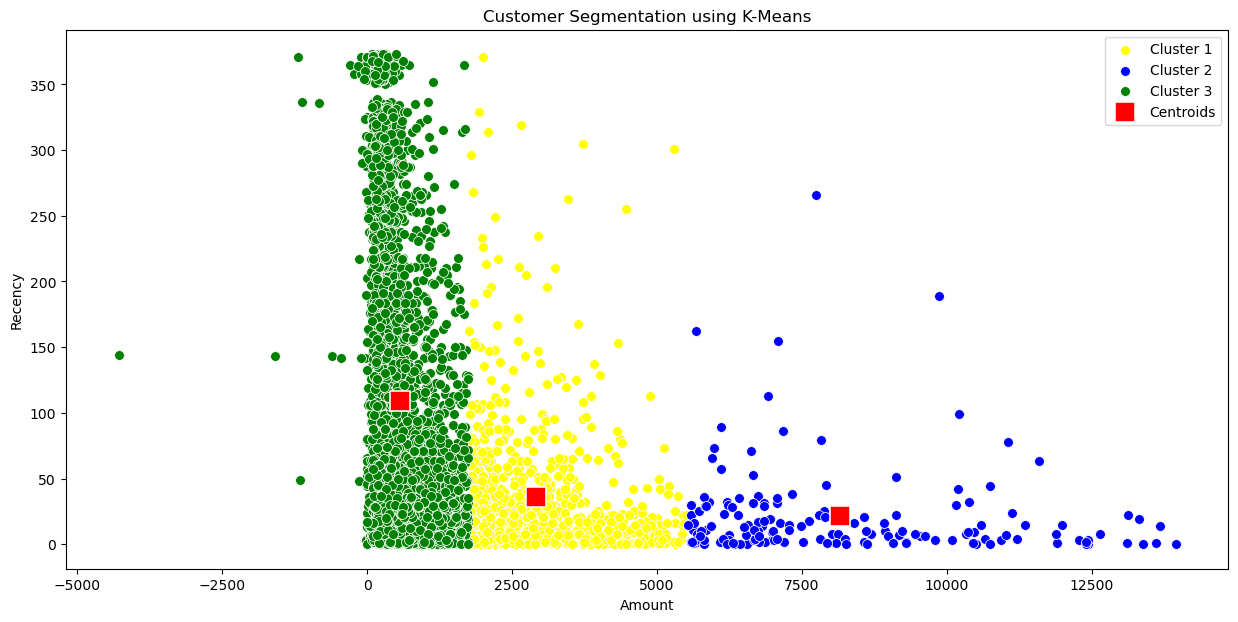

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the clusters
plt.figure(figsize=(15, 7))

sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color='grey', label='Cluster 4', s=50)
# Uncomment below line if you have 5 clusters
# sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='orange', label='Cluster 5', s=50)

plt.xlabel("Amount")
plt.ylabel("Recency")

# Plotting centroids
sns.scatterplot(
    kmeans.cluster_centers_[:4, 0],  # change [:4] to [:5] if you have 5 clusters
    kmeans.cluster_centers_[:4, 1],
    color='red',
    label='Centroids',
    s=200,
    marker='s'
)

plt.legend()
plt.title("Customer Segmentation using K-Means")
plt.show()
